In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss 
!pip install catboost
import catboost as catboost
from catboost import CatBoostClassifier
from sklearn.utils import shuffle

In [92]:
train = pd.read_csv('https://raw.githubusercontent.com/miguelAfonzalida/TP2_Orga_Datos_2C-2020/main/train_label_enc.csv?token=AG4D7WDU2P4LTBGQLPL7B5TAJET5K')
test = pd.read_csv('https://raw.githubusercontent.com/miguelAfonzalida/TP2_Orga_Datos_2C-2020/main/test_label_enc.csv?token=AG4D7WDXRJYVM7SJ3J6DPADAJEUP6')

In [93]:
features = list(set(train.columns) - set(['ID','Stage','contrato','Sales_Contract_No','Opportunity_ID','Opportunity_Created_Date','Account_Created_Date','Opportunity_Name',\
                                        'Price', 'Currency', 'ASP', 'ASP_converted_Currency', 'ASP_(converted)',\
                                        'Planned_Delivery_Start_Date','Size', 'Planned_Delivery_End_Date', 'Month',\
                                         'Delivery_Year', 'Actual_Delivery_Date','Product_Type','Product_Category_B',\
                                        'Total_Amount_Currency', 'Total_Amount','Last_Activity',\
                                        'Quote_Expiry_Date', 'Last_Modified_Date',\
                                        'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount','Account_Created_Date'\
                                          ,'Total_moneda_local','ASP_Currency','Last_Modified_By','Brand','Bureaucratic_Code',\
                                         'tiempo_creacion_ulti_mod','ASP_converted','Product_Name']))

In [19]:
train['Stage'].value_counts()

1.0    9529
0.0    7315
Name: Stage, dtype: int64

In [29]:
train_pos= train.loc[train['Stage']==1,:].sample(7315)
train_neg = train.loc[train['Stage']==0,:].sample(7315)
train=pd.concat([train_pos,train_neg]).drop_duplicates(keep=False)
train= shuffle(train)

In [30]:
X = train[features]
Y = train['Stage']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
y_train =y_train.astype('float32')
y_test =y_test.astype('float32')

In [36]:
x_train = x_train.fillna(0)
y_train = y_train.fillna(0)
x_test = x_test.fillna(0)
y_test = y_test.fillna(0)

In [ ]:
xgb1 = xgb.XGBClassifier(n_jobs=-1,learning_rate=0.03,n_estimators=150)
xgb1.fit(x_train, y_train)
preds = xgb1.predict_proba(x_test)
score = log_loss(y_test, preds)
print(score)

0.47369731122351166


In [ ]:
y = []
estimators = range(100,1001,10)

print('Estimators Tuning...\n')

for n in estimators:
  xgb1 = xgb.XGBClassifier(n_jobs=-1,learning_rate=0.03,n_estimators=n)
  xgb1.fit(x_train, y_train)
  preds = xgb1.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training XGBoost: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(min(y))],' with ',min(y),' log loss')

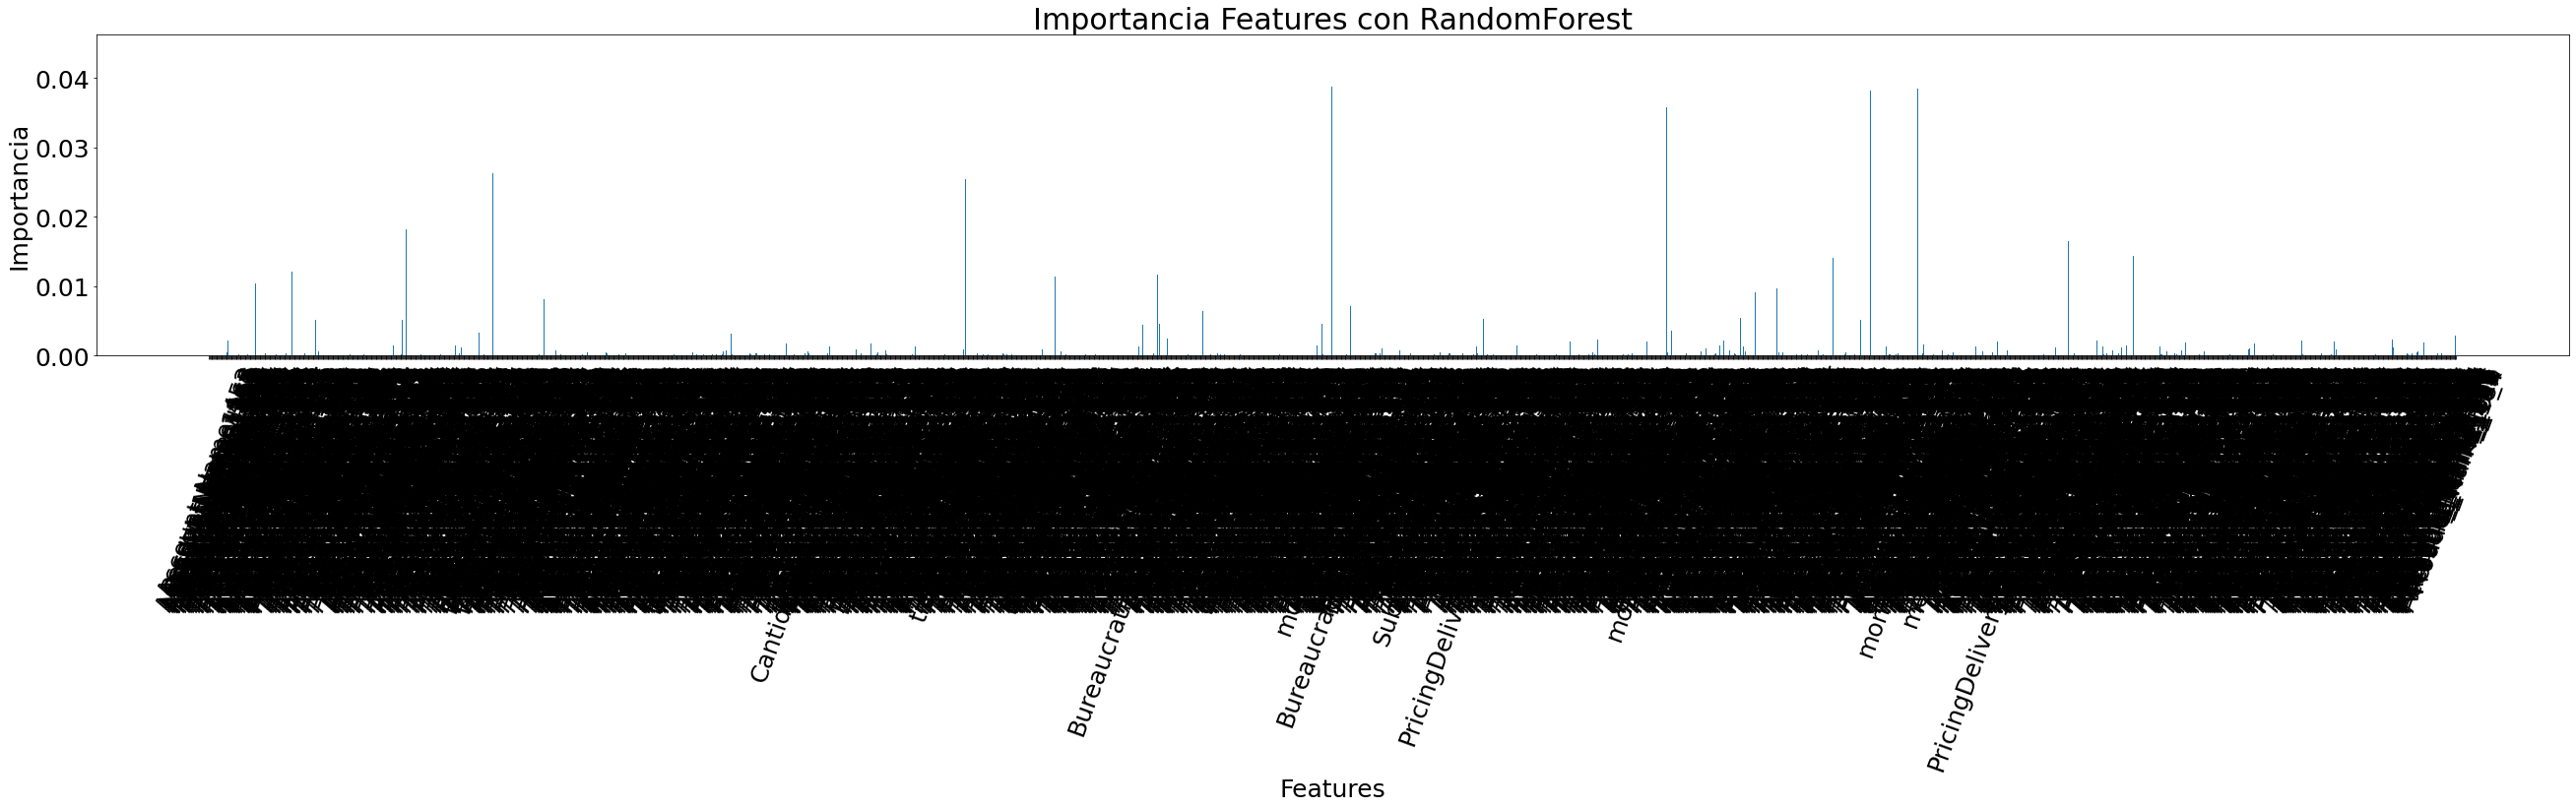

In [34]:
import matplotlib 
model_tuned = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
model_tuned.fit(x_train, y_train)
matplotlib.rcParams.update({'font.size': 25})
plt.figure(figsize=(45, 6))  # width:20, height:3
plt.bar(x_train.columns, model_tuned.feature_importances_,align='edge',width=0.6)
plt.xticks(rotation=70)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RandomForest')
plt.show()

In [39]:
y = []
estimators = range(1,101,10)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'entropy')
  model_tuned.fit(x_train, y_train)
  preds = model_tuned.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(min(y))],' with ',min(y),' log loss')

Estimators Tuning...

Training Random Forest: Estimators ->  1 ... Score:  5.016739565221135 

Training Random Forest: Estimators ->  11 ... Score:  0.4129452908017421 

Training Random Forest: Estimators ->  21 ... Score:  0.28225736377887 

Training Random Forest: Estimators ->  31 ... Score:  0.24921704988669147 

Training Random Forest: Estimators ->  41 ... Score:  0.24882610158165244 

Training Random Forest: Estimators ->  51 ... Score:  0.23712297292523354 

Training Random Forest: Estimators ->  61 ... Score:  0.23695907701973018 

Training Random Forest: Estimators ->  71 ... Score:  0.23710210858253367 

Training Random Forest: Estimators ->  81 ... Score:  0.2261118215016438 

Training Random Forest: Estimators ->  91 ... Score:  0.22610892779091946 

DONE!

The best n_estimator is  91  with  0.22610892779091946  log loss


In [37]:
y = []
estimators = range(100,1001,10)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'entropy')
  model_tuned.fit(x_train, y_train)
  preds = model_tuned.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(min(y))],' with ',min(y),' log loss')

Estimators Tuning...

Training Random Forest: Estimators ->  100 ... Score:  0.225995860600528 

Training Random Forest: Estimators ->  110 ... Score:  0.2159585987365498 

Training Random Forest: Estimators ->  120 ... Score:  0.21573530200298233 

Training Random Forest: Estimators ->  130 ... Score:  0.21559451663773382 

Training Random Forest: Estimators ->  140 ... Score:  0.21512787984632065 

Training Random Forest: Estimators ->  150 ... Score:  0.2149492926723299 

Training Random Forest: Estimators ->  160 ... Score:  0.21501440331187496 

Training Random Forest: Estimators ->  170 ... Score:  0.2152073073520629 

Training Random Forest: Estimators ->  180 ... Score:  0.21520173426458458 

Training Random Forest: Estimators ->  190 ... Score:  0.2150609660644072 

Training Random Forest: Estimators ->  200 ... Score:  0.2154284568479061 

Training Random Forest: Estimators ->  210 ... Score:  0.2153103817311738 

Training Random Forest: Estimators ->  220 ... Score:  0.21524

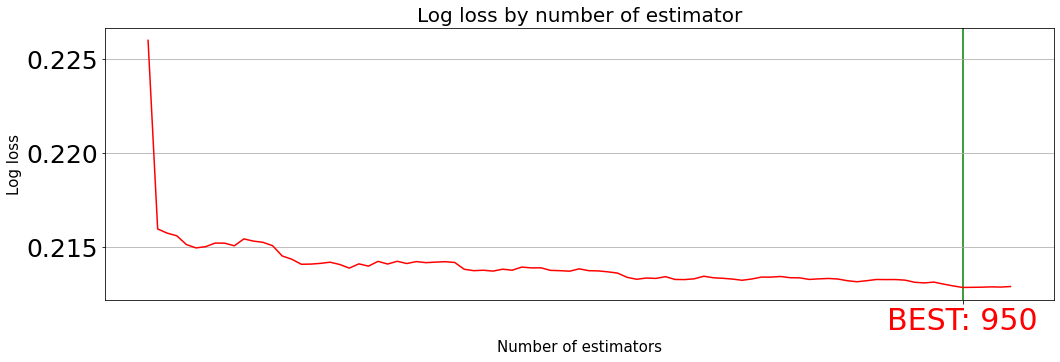

In [38]:
x = estimators
n_estimator = estimators[y.index(min(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Log loss by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Log loss',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

In [94]:
test = test.fillna(0)

In [95]:
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 300, criterion = 'entropy')
rf_model.fit(x_train, y_train)
preds = rf_model.predict_proba(test[features])[:,1]

In [40]:
y = []
estimators = range(100,1001,10)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'gini')
  model_tuned.fit(x_train, y_train)
  preds = model_tuned.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(min(y))],' with ',min(y),' log loss')

Estimators Tuning...

Training Random Forest: Estimators ->  100 ... Score:  0.21500232397957084 

Training Random Forest: Estimators ->  110 ... Score:  0.21529142444207075 

Training Random Forest: Estimators ->  120 ... Score:  0.21495802586899015 

Training Random Forest: Estimators ->  130 ... Score:  0.21460916397950897 

Training Random Forest: Estimators ->  140 ... Score:  0.21480152259815455 

Training Random Forest: Estimators ->  150 ... Score:  0.21460263518457814 



KeyboardInterrupt: ignored

In [ ]:
depths = range(20,41)
y.clear()

#Tomo la cantidad de estimadores que maximizo el anterior cross validation
n_estimator = 680

#Tomo como criterio 'entropy'

print('Depth Tuning...\n')

for n in depths:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'entropy', max_depth = n)
  model_tuned.fit(x_train, y_train)
  preds = model_tuned.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training Random Forest: Max depth -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best depth is ',depths[y.index(min(y))],' with ',min(y),' log loss')

Depth Tuning...

Training Random Forest: Max depth ->  20 ... Score:  0.39817265551987535 

Training Random Forest: Max depth ->  21 ... Score:  0.4114113605638332 

Training Random Forest: Max depth ->  22 ... Score:  0.4102624218852152 

Training Random Forest: Max depth ->  23 ... Score:  0.41173872634361997 

Training Random Forest: Max depth ->  24 ... Score:  0.41041719848431896 

Training Random Forest: Max depth ->  25 ... Score:  0.4124720586169218 

Training Random Forest: Max depth ->  26 ... Score:  0.39739771284106246 

Training Random Forest: Max depth ->  27 ... Score:  0.3976007603279932 

Training Random Forest: Max depth ->  28 ... Score:  0.396976120742294 

Training Random Forest: Max depth ->  29 ... Score:  0.3969784909441199 

Training Random Forest: Max depth ->  30 ... Score:  0.397672397240541 

Training Random Forest: Max depth ->  31 ... Score:  0.3971065986523379 

Training Random Forest: Max depth ->  32 ... Score:  0.3973918415448127 

Training Random For

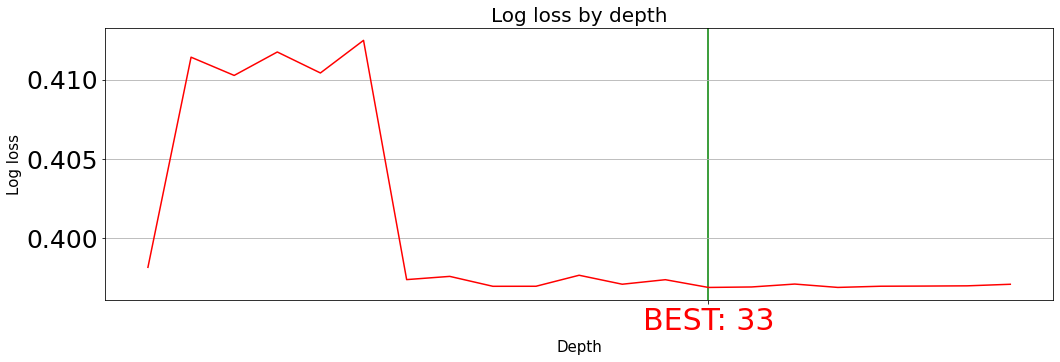

In [ ]:
x = depths
n_depths = depths[y.index(min(y))]
tick = 'BEST' + ': ' + str(n_depths)
plt.figure(figsize=(17,5))
plt.title('Log loss by depth',fontsize = 20)
plt.xlabel('Depth', fontsize = 15)
plt.ylabel('Log loss',fontsize = 15)
plt.xticks([n_depths],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

In [ ]:
y.clear()
samples_split = [2,3,4,5,6,7,8,9,10,11,12]

print('Sample split Tuning...\n')

for n in samples_split:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = 770, criterion = 'entropy', max_depth = 27, min_samples_split = n)
  model_tuned.fit(x_train, y_train)
  preds = model_tuned.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training Random Forest: Sample split -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best sample split is ',samples_split[y.index(min(y))],' with ',min(y),' log loss')

Sample split Tuning...

Training Random Forest: Sample split ->  2 ... Score:  0.380985189339868 

Training Random Forest: Sample split ->  3 ... Score:  0.41157967102837223 

Training Random Forest: Sample split ->  4 ... Score:  0.4132909849134056 

Training Random Forest: Sample split ->  5 ... Score:  0.4135641603871358 

Training Random Forest: Sample split ->  6 ... Score:  0.3863143035271307 

Training Random Forest: Sample split ->  7 ... Score:  0.40016728002559787 

Training Random Forest: Sample split ->  8 ... Score:  0.38857046621573593 

Training Random Forest: Sample split ->  9 ... Score:  0.40482970147532255 

Training Random Forest: Sample split ->  10 ... Score:  0.3916089016185419 

Training Random Forest: Sample split ->  11 ... Score:  0.4063563598123121 

Training Random Forest: Sample split ->  12 ... Score:  0.4078266465184118 

DONE!

The best sample split is  2  with  0.380985189339868  log loss


In [ ]:
y.clear()
features = range(2,30)

print('Max features Tuning...\n')

for n in features:
  model = RandomForestClassifier(random_state = 0, n_estimators = 770, criterion = 'entropy', max_depth = 27, min_samples_split = 2,\
                                 max_features = n)
  model.fit(x_train, y_train)
  preds = model_tuned.predict_proba(x_test)
  score = log_loss(y_test, preds)
  print('Training Random Forest:  Max features -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best max number of features is ',features[y.index(min(y))],' with ',min(y),' log loss')

Max features Tuning...

Training Random Forest:  Max features ->  2 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  3 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  4 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  5 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  6 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  7 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  8 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  9 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  10 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  11 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  12 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  13 ... Score:  0.4078266465184118 

Training Random Forest:  Max features ->  14 ...

In [ ]:
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 1000, criterion = 'gini')
rf_model.fit(x_train, y_train)
preds = rf_model.predict_proba(test[features])[:,1]

In [ ]:
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 770, criterion = 'entropy')
rf_model.fit(x_train, y_train)
preds = rf_model.predict_proba(test[features])[:,1]

In [ ]:
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 770, criterion = 'entropy', max_depth = 27)
rf_model.fit(x_train, y_train)
preds = rf_model.predict_proba(test[features])[:,1]

In [ ]:
model = CatBoostClassifier()
model.fit(x_train, y_train)
preds = model.predict_proba(test[features])[:,1]

Learning rate set to 0.024809
0:	learn: 0.6841064	total: 6.61ms	remaining: 6.6s
1:	learn: 0.6747670	total: 13ms	remaining: 6.49s
2:	learn: 0.6650904	total: 21.3ms	remaining: 7.07s
3:	learn: 0.6561671	total: 27.6ms	remaining: 6.87s
4:	learn: 0.6477580	total: 33.8ms	remaining: 6.72s
5:	learn: 0.6403929	total: 40ms	remaining: 6.63s
6:	learn: 0.6328459	total: 46.5ms	remaining: 6.59s
7:	learn: 0.6254280	total: 52.6ms	remaining: 6.52s
8:	learn: 0.6184721	total: 59.2ms	remaining: 6.51s
9:	learn: 0.6123452	total: 65.7ms	remaining: 6.5s
10:	learn: 0.6063702	total: 72.5ms	remaining: 6.52s
11:	learn: 0.6013110	total: 78.8ms	remaining: 6.49s
12:	learn: 0.5957070	total: 85.2ms	remaining: 6.47s
13:	learn: 0.5916232	total: 91.5ms	remaining: 6.44s
14:	learn: 0.5870334	total: 97.8ms	remaining: 6.42s
15:	learn: 0.5822851	total: 104ms	remaining: 6.4s
16:	learn: 0.5777799	total: 111ms	remaining: 6.4s
17:	learn: 0.5730362	total: 117ms	remaining: 6.4s
18:	learn: 0.5692990	total: 132ms	remaining: 6.84s
19:	l

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(x_train, y_train)

params = {
    'objective': 'regression',
    'metric': 'log_loss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100)

preds = gbm.predict(test[features], num_iteration=gbm.best_iteration)

In [59]:
len(test)

2551

In [82]:
len(preds)

2551

In [96]:
test['target']=preds

In [97]:
test[['Opportunity_ID', 'target']]

,Opportunity_ID,target
0,10689,0.690000
1,10689,0.726667
2,10689,0.706667
3,10690,0.580000
4,10690,0.596667
...,...,...
2546,12364,0.843333
2547,12365,0.616667
2548,12366,0.423333
2549,12367,0.520000


In [98]:
test = test.groupby(['Opportunity_ID'], as_index=False)['target'].mean()[['Opportunity_ID', 'target']]
len(test)

1567

In [99]:
test[['Opportunity_ID', 'target']].to_csv("RandomForest300Estimators", index=False)